# IMDb - Score prediction

In [939]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('movie_metadata.csv')

In [940]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [941]:
data.shape

(5043, 28)

In [942]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [943]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [944]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [945]:
data.isnull().sum().sort_values(ascending = False)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          21
color                         19
duration                      15
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
language                      12
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
cast_total_facebook_likes      0
num_voted_users                0
movie_title                    0
movie_imdb_link                0
genres                         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [946]:
data.dropna(how = 'any',axis = 0,inplace = True)

In [947]:
data.isnull().sum().sort_values(ascending = False)

color                        0
director_name                0
aspect_ratio                 0
imdb_score                   0
actor_2_facebook_likes       0
title_year                   0
budget                       0
content_rating               0
country                      0
language                     0
num_user_for_reviews         0
movie_imdb_link              0
plot_keywords                0
facenumber_in_poster         0
actor_3_name                 0
cast_total_facebook_likes    0
num_voted_users              0
movie_title                  0
actor_1_name                 0
genres                       0
gross                        0
actor_1_facebook_likes       0
actor_2_name                 0
actor_3_facebook_likes       0
director_facebook_likes      0
duration                     0
num_critic_for_reviews       0
movie_facebook_likes         0
dtype: int64

In [948]:
numerical_features = data.select_dtypes(exclude=['object']).columns
categorical_features = data.select_dtypes(include=['object']).columns
numerical_features, categorical_features

(Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
        'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
        'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
        'num_user_for_reviews', 'budget', 'title_year',
        'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
        'movie_facebook_likes'],
       dtype='object'),
 Index(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
        'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link',
        'language', 'country', 'content_rating'],
       dtype='object'))

In [949]:
num_data = data[numerical_features]
cat_data = data[categorical_features]

In [950]:
num_data.isnull().sum().sort_values(ascending = False)

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [951]:
num_data.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


In [952]:
num_data.drop(['title_year'],axis = 1, inplace = True)


In [953]:
numerical_features = numerical_features.drop('title_year')

In [954]:
numerical_features.size

15

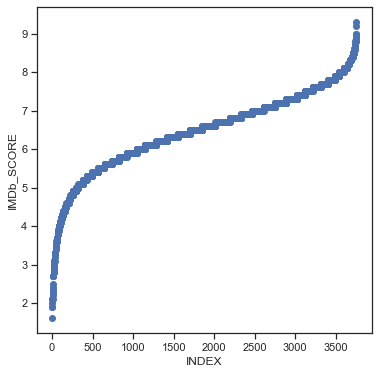

In [955]:
plt.figure(figsize=(6,6))
plt.scatter(range(num_data.shape[0]), np.sort(num_data.imdb_score.values))
plt.xlabel('INDEX')
plt.ylabel('IMDb_SCORE')
plt.show()

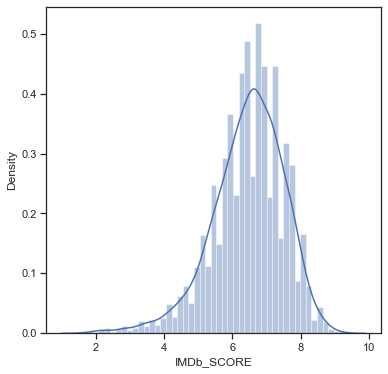

In [956]:
plt.figure(figsize=(6,6))
sns.distplot(num_data.imdb_score.values)
plt.xlabel('IMDb_SCORE', fontsize=12)
plt.show()

In [957]:
def scatter_with_IMDB(num_data):
    sns.set(style="ticks")
    fig, ax = plt.subplots(figsize=(15,30), ncols=3, nrows= (int(num_data.shape[1]/3)) + 1)
    col = 0
    row = 0
    for i in num_data.columns.tolist():
        ax[row,col].set(ylabel='IMDb_SCORE', xlabel=i)
        ax[row,col].scatter(x=num_data[i], y=num_data['imdb_score'])
        col += 1
        if (col == 3):
            col = 0
            row += 1

<AxesSubplot:xlabel='cast_total_facebook_likes'>

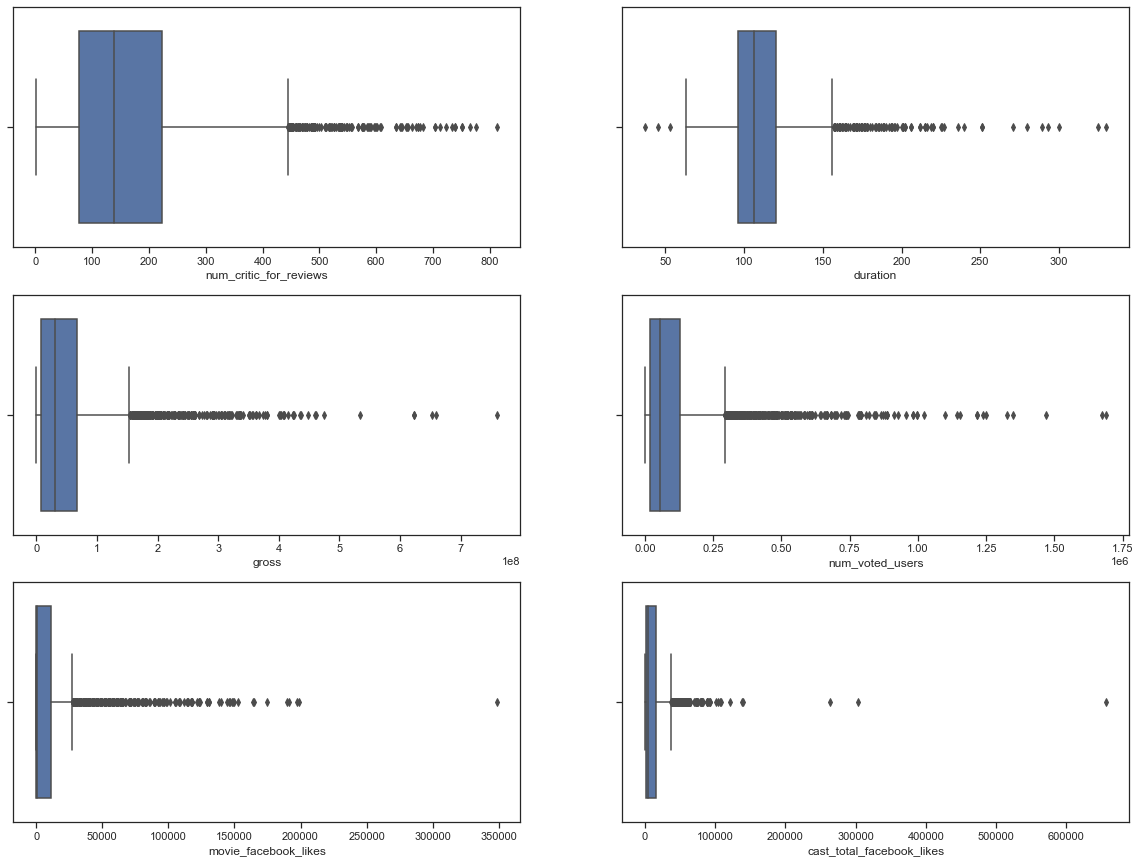

In [958]:
fig, ax = plt.subplots(figsize=(20,15), ncols=2, nrows=3)
sns.set_style("whitegrid")
sns.boxplot(x="num_critic_for_reviews", data=num_data, ax = ax[0][0])
sns.boxplot(x="duration", data=num_data, ax = ax[0][1])
sns.boxplot(x="gross", data=num_data, ax = ax[1][0])
sns.boxplot(x="num_voted_users", data=num_data, ax = ax[1][1])
sns.boxplot(x="movie_facebook_likes", data=num_data, ax = ax[2][0])
sns.boxplot(x="cast_total_facebook_likes", data=num_data, ax = ax[2][1])

# Outliers

In [959]:
import numpy as np

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [960]:
test = outliers_iqr(num_data['imdb_score'])
test = list(test)

In [961]:
num_data.drop(num_data.index[test],inplace = True)
cat_data.drop(cat_data.index[test],inplace = True)

In [962]:
a = num_data[(num_data.num_voted_users < 10000)].index

In [963]:
num_data.drop(a,inplace = True)
cat_data.drop(a,inplace = True)

In [964]:
num_data.shape

(3167, 15)

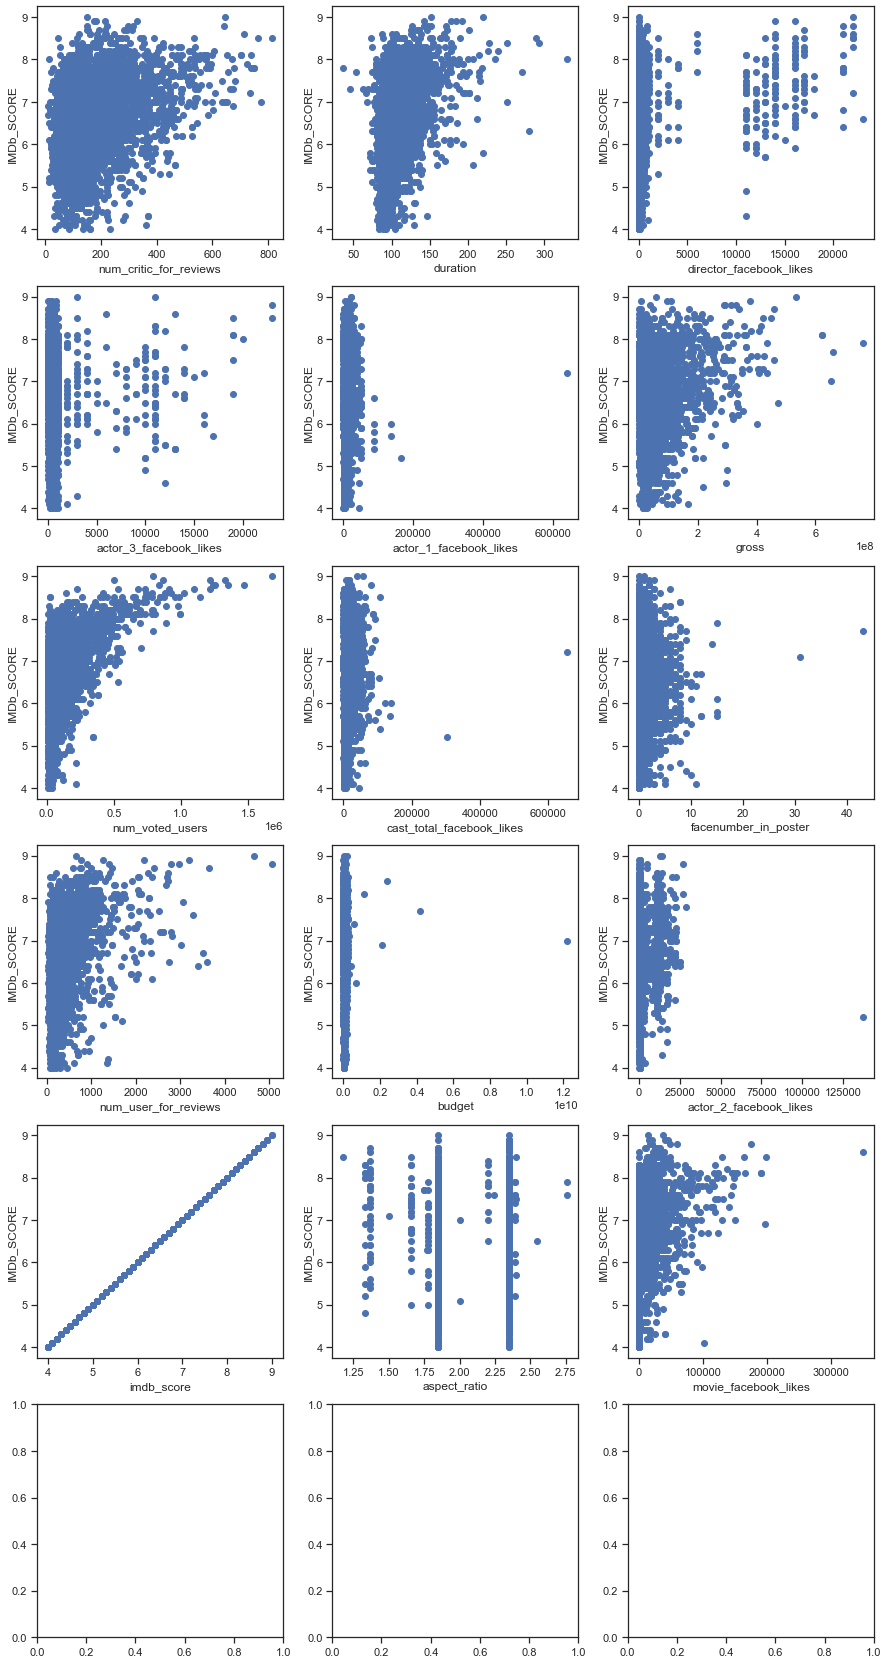

In [965]:
scatter_with_IMDB(num_data)

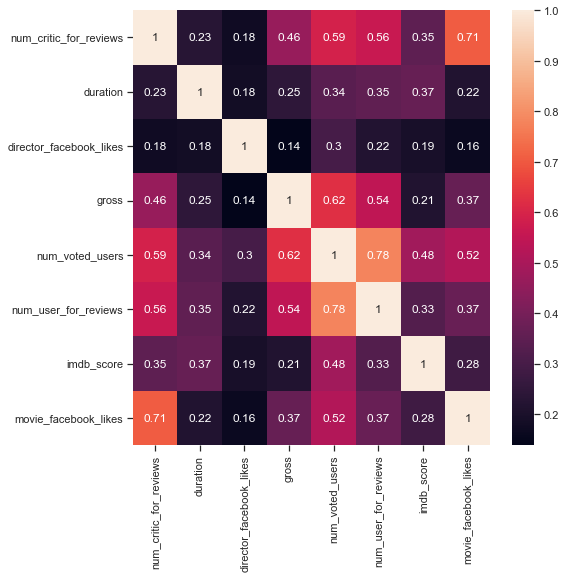

In [966]:
corrmat = num_data.corr()
plt.figure(figsize = (8,8))
top_corr_features = corrmat.index[abs(corrmat["imdb_score"])>0.1]
g = sns.heatmap(data[top_corr_features].corr(),annot=True)

In [967]:
corrmat.sort_values(["imdb_score"], ascending = False, inplace = True)
print(corrmat.imdb_score)

imdb_score                   1.000000
num_voted_users              0.514526
duration                     0.371942
num_user_for_reviews         0.333493
num_critic_for_reviews       0.309514
movie_facebook_likes         0.285769
director_facebook_likes      0.203727
gross                        0.185152
cast_total_facebook_likes    0.079889
actor_2_facebook_likes       0.079078
actor_1_facebook_likes       0.069796
actor_3_facebook_likes       0.049147
budget                       0.018063
aspect_ratio                -0.019651
facenumber_in_poster        -0.050432
Name: imdb_score, dtype: float64


In [968]:
corrmat.index[abs(corrmat['imdb_score']) > 0.3].tolist()

['imdb_score',
 'num_voted_users',
 'duration',
 'num_user_for_reviews',
 'num_critic_for_reviews']

In [969]:
num_data.columns.tolist()

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [970]:
num_data.drop([
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'budget',
 'actor_2_facebook_likes',
 'aspect_ratio'],inplace = True,axis = 1)

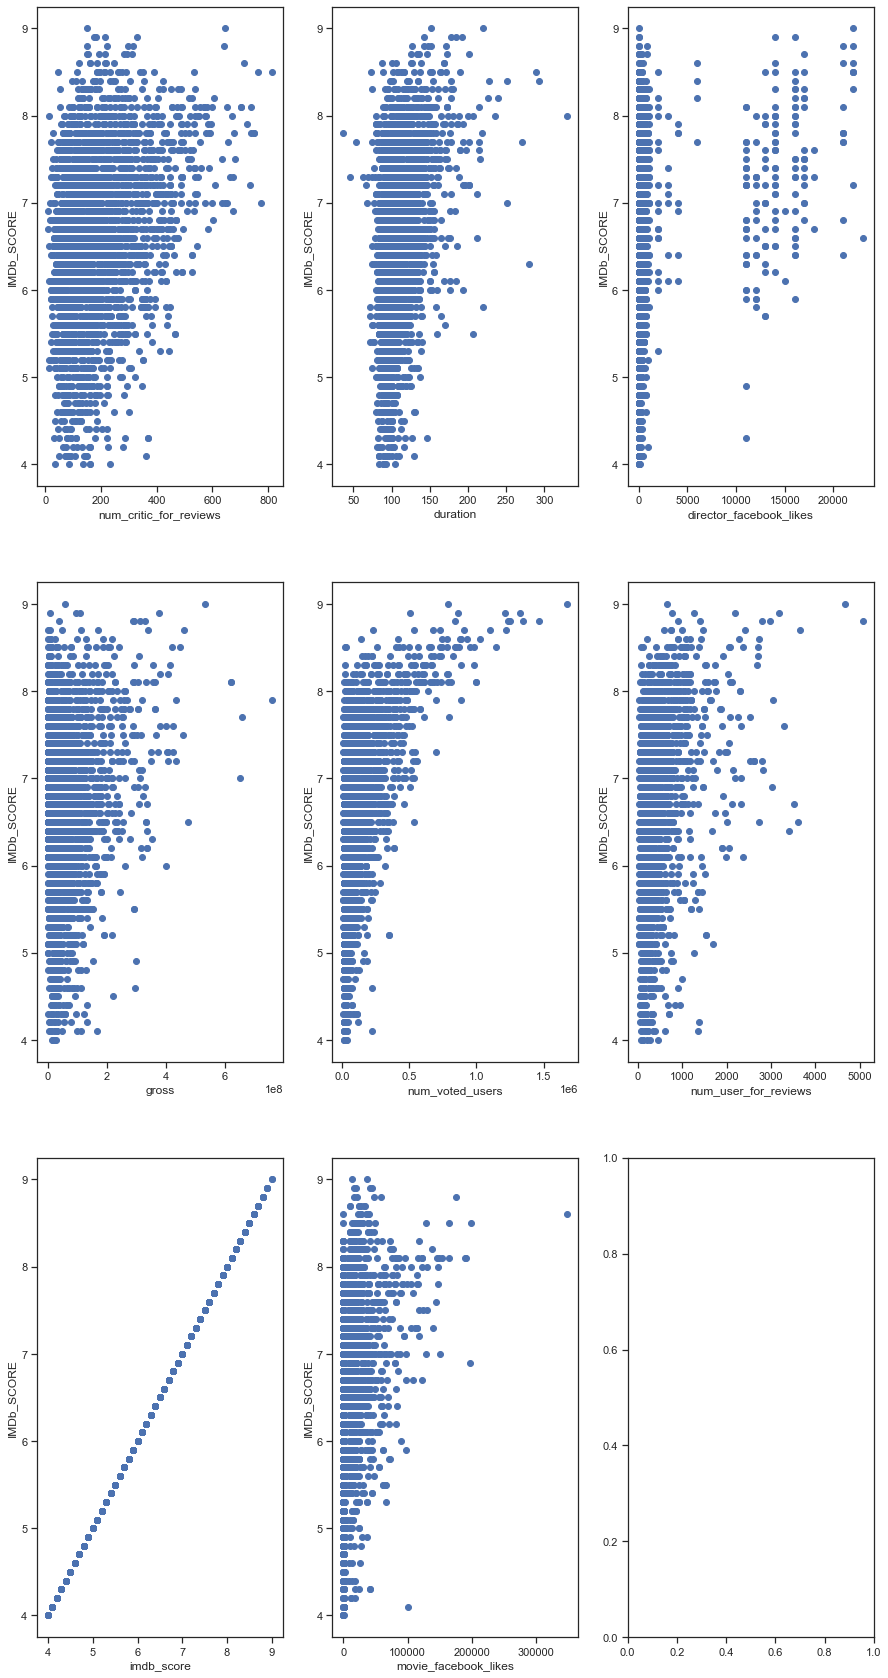

In [971]:
scatter_with_IMDB(num_data)

In [972]:
num_data.isnull().sum().sort_values(ascending = False)

num_critic_for_reviews     0
duration                   0
director_facebook_likes    0
gross                      0
num_voted_users            0
num_user_for_reviews       0
imdb_score                 0
movie_facebook_likes       0
dtype: int64

In [973]:
num_data.median()

num_critic_for_reviews          159.0
duration                        107.0
director_facebook_likes          79.0
gross                      36874745.0
num_voted_users               68935.0
num_user_for_reviews            248.0
imdb_score                        6.7
movie_facebook_likes              0.0
dtype: float64

In [974]:
num_data.fillna(num_data.median(),inplace = True)

### Categorical Variable Genre 

In [975]:
df_genres = pd.DataFrame(cat_data['genres'])
df_genres = pd.DataFrame(df_genres.genres.str.split('|').tolist(),columns = ["Genre_"+str(i) for i in  range(0,8)] )

df_genres = df_genres.reindex(cat_data.index)


cat_data.drop('genres',inplace = True, axis = 1)
cat_data = cat_data.merge(df_genres,left_index = True,right_index = True)

In [976]:
cat_data.shape

(3167, 19)

### Plot Keywords Handling

In [977]:
df_plot_keywords = pd.DataFrame(cat_data['plot_keywords'])
df_plot_keywords = pd.DataFrame(df_plot_keywords.plot_keywords.str.split('|').tolist(),columns = ["plot_keywords_"+str(i) for i in  range(0,5)] )
cat_data.drop('plot_keywords',inplace = True, axis = 1)
df_plot_keywords = df_plot_keywords.reindex(cat_data.index)
cat_data = cat_data.merge(df_plot_keywords,left_index = True,right_index = True)

In [978]:
cat_data.head(2)

,color,director_name,actor_2_name,actor_1_name,movie_title,actor_3_name,movie_imdb_link,language,country,content_rating,...,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,plot_keywords_0,plot_keywords_1,plot_keywords_2,plot_keywords_3,plot_keywords_4
0,Color,James Cameron,Joel David Moore,CCH Pounder,Avatar,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13,...,Sci-Fi,None,None,None,None,avatar,future,marine,native,paraplegic
1,Color,Gore Verbinski,Orlando Bloom,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13,...,None,None,None,None,None,goddess,marriage ceremony,marriage proposal,pirate,singapore


In [979]:
cat_data.shape

(3167, 23)

In [980]:
cat_data.nunique().sort_values()


color                 2
Genre_7               2
Genre_6               8
Genre_5              10
content_rating       12
Genre_4              15
Genre_3              16
Genre_0              16
Genre_2              19
Genre_1              20
language             29
country              41
actor_1_name       1174
plot_keywords_0    1257
director_name      1294
plot_keywords_4    1421
plot_keywords_1    1492
plot_keywords_3    1514
plot_keywords_2    1575
actor_2_name       1834
actor_3_name       2220
movie_title        3069
movie_imdb_link    3070
dtype: int64

In [981]:
cat_data.columns

Index(['color', 'director_name', 'actor_2_name', 'actor_1_name', 'movie_title',
       'actor_3_name', 'movie_imdb_link', 'language', 'country',
       'content_rating', 'Genre_0', 'Genre_1', 'Genre_2', 'Genre_3', 'Genre_4',
       'Genre_5', 'Genre_6', 'Genre_7', 'plot_keywords_0', 'plot_keywords_1',
       'plot_keywords_2', 'plot_keywords_3', 'plot_keywords_4'],
      dtype='object')

In [982]:
cat_data.drop(['movie_imdb_link','Genre_6','Genre_7'],inplace = True, axis = 1)

In [983]:
whole_data = pd.concat([num_data,cat_data],axis = 1)

In [984]:
y = whole_data['imdb_score']

In [985]:
whole_data.drop('imdb_score',axis = 1,inplace = True)

In [986]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(whole_data,y, random_state = 0,test_size = 0.2)

In [987]:
num_feat = whole_data.select_dtypes(exclude=['object']).columns.tolist()
cat_feat = whole_data.select_dtypes(include=['object']).columns.tolist()

In [988]:
X_train_num = X_train[num_feat]
X_train_cat = X_train[cat_feat]

In [989]:
X_test_num = X_test[num_feat]

X_test_cat = X_test[cat_feat]

# Skewness

In [990]:
from scipy.stats import skew 
skewness = X_train_num.apply(lambda x: skew(x.dropna()))
skewness = skewness[abs(skewness) > 0.75]
skew_features = X_train_num[skewness.index]
skew_features  = np.log1p(skew_features)
X_train_num[skewness.index] = skew_features

In [991]:
X_train_num.head()

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,num_user_for_reviews,movie_facebook_likes
2803,5.529429,4.927254,4.969813,15.512927,11.438008,5.771441,8.517393
371,5.293305,4.736198,5.402677,18.420869,11.959846,5.942799,0.000000
1080,3.688879,4.787492,6.295266,18.338551,10.732018,4.553877,6.908755
2493,5.648974,4.394449,6.416732,11.349959,11.914483,6.735780,0.000000
1217,4.836282,5.332719,0.000000,18.069782,11.639320,6.093570,0.000000


## Standardize 

In [992]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
for i, col in enumerate(num_feat):
    X_train_num.loc[:,col] = X_train_num_scaled[:, i]

## Transformations on Numeric Test data

In [993]:
from scipy.stats import skew 
skewness = X_test_num.apply(lambda x: skew(x.dropna()))
skewness = skewness[abs(skewness) > 0.75]
skew_features = X_test_num[skewness.index]
skew_features  = np.log1p(skew_features)
X_test_num[skewness.index] = skew_features

In [994]:
X_test_num_scaled = scaler.transform(X_test_num)

In [995]:
for i, col in enumerate(num_feat):
    X_test_num.loc[:,col] = X_test_num_scaled[:, i]

## Random Forest Regressor

In [996]:
from sklearn.ensemble import RandomForestRegressor
dt = RandomForestRegressor(n_estimators = 1000,n_jobs=-1,random_state = 0)
dt.fit(X_train_num, y_train)
dt_score_train = dt.score(X_train_num, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test_num, y_test)
print("Testing score: ",dt_score_test)

Training score:  0.9321966049665169
Testing score:  0.5411231950233011


### Numerical Feature Importance

Text(0.5, 0, 'importance')

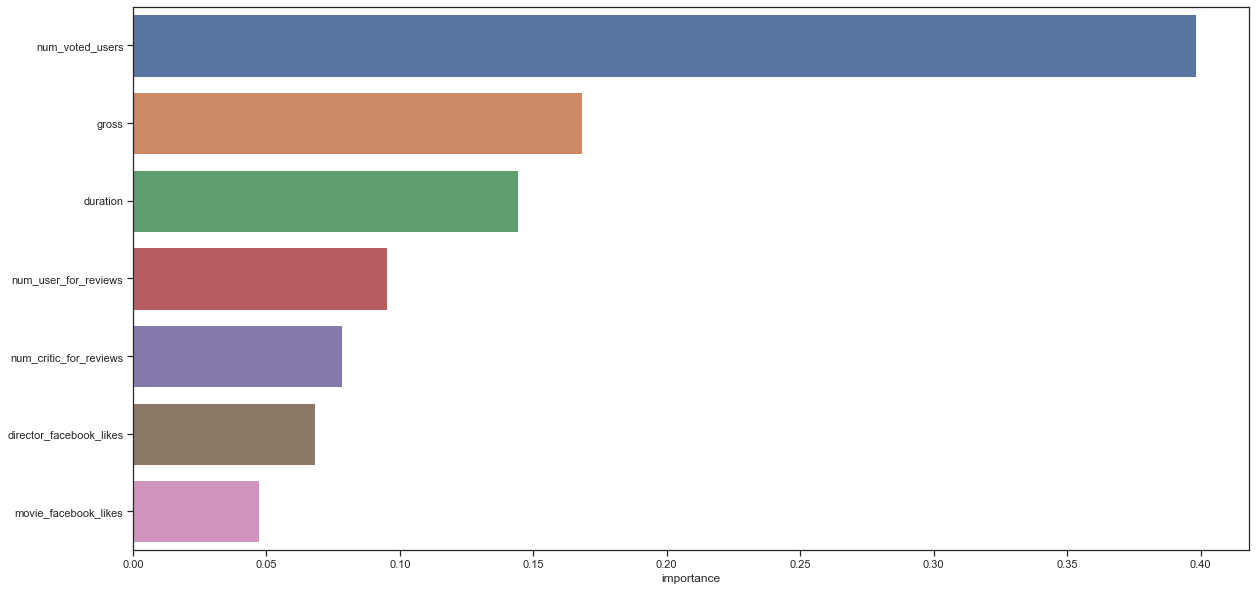

In [997]:
df = pd.DataFrame(data = dt.feature_importances_,index = X_train_num.columns.tolist())

df = df[df.iloc[:,0] > 0].sort_values(by = 0,ascending = False)
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(y = df.index, x= df[0])
plt.xlabel('importance')

                          looks like number of voter users and duration has lot to say about imdb_score

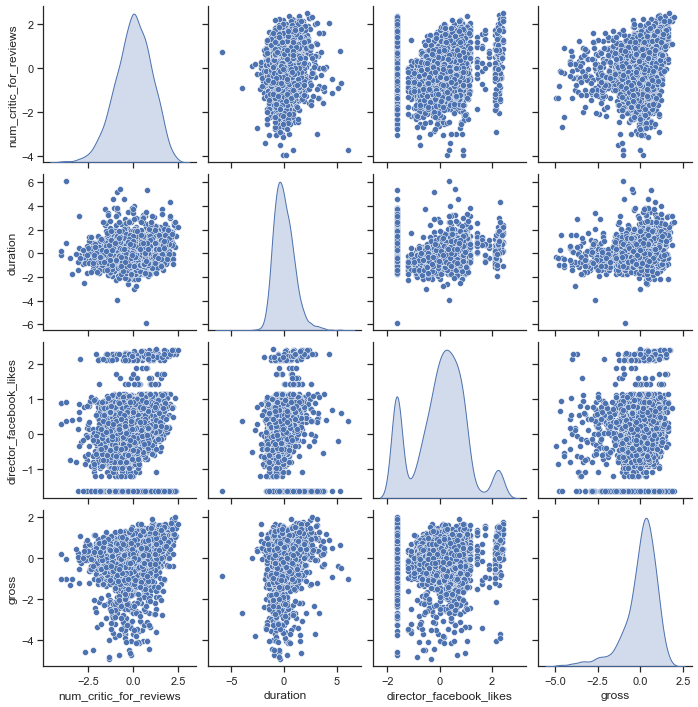

In [998]:
sns.set(style="ticks")
sns.pairplot(X_train_num.iloc[:,:4],diag_kind="kde")

In [999]:
for i in cat_feat:
    print('Feature: ',i)
    print(X_train_cat[i].value_counts()[:7].sum())
    print('--------------------------------------')

    

Feature:  color
2533
--------------------------------------
Feature:  director_name
102
--------------------------------------
Feature:  actor_2_name
73
--------------------------------------
Feature:  actor_1_name
179
--------------------------------------
Feature:  movie_title
17
--------------------------------------
Feature:  actor_3_name
39
--------------------------------------
Feature:  language
2500
--------------------------------------
Feature:  country
2436
--------------------------------------
Feature:  content_rating
2522
--------------------------------------
Feature:  Genre_0
1972
--------------------------------------
Feature:  Genre_1
1427
--------------------------------------
Feature:  Genre_2
1076
--------------------------------------
Feature:  Genre_3
568
--------------------------------------
Feature:  Genre_4
196
--------------------------------------
Feature:  Genre_5
49
--------------------------------------
Feature:  plot_keywords_0
148
---------------------

In [1000]:
X_train_cat.drop(['Genre_2','Genre_3','Genre_4','Genre_5'],axis = 1,inplace = True)
X_test_cat.drop(['Genre_2','Genre_3','Genre_4','Genre_5'],axis = 1,inplace = True)

In [1001]:
temp_cat = pd.concat([X_train_cat,X_test_cat])

In [1002]:
temp_cat.country.value_counts()[:10].index.tolist()

['USA',
 'UK',
 'France',
 'Germany',
 'Canada',
 'Australia',
 'Spain',
 'Hong Kong',
 'Japan',
 'China']

In [1003]:
temp_cat.loc[temp_cat[~temp_cat["country"].isin(['USA',
 'UK',
 'France',
 'Germany'])].index,"country"] = "Other"
temp_cat.country.value_counts()

USA        2528
UK          274
Other       212
France       82
Germany      71
Name: country, dtype: int64

In [1004]:
cat_data.language.value_counts()[:5]

English     3047
French        25
Spanish       15
Mandarin      11
German        10
Name: language, dtype: int64

In [1005]:
temp_cat["language"] = (temp_cat["language"] == "English") * 1
temp_cat.language.value_counts()

1    3047
0     120
Name: language, dtype: int64

In [1006]:
temp_cat.content_rating.value_counts()[:10]

R            1436
PG-13        1143
PG            462
G              64
Not Rated      24
Approved       14
X               9
Unrated         7
NC-17           4
M               2
Name: content_rating, dtype: int64

In [1007]:
temp_cat.loc[temp_cat[(temp_cat["content_rating"] != "R")&(temp_cat["content_rating"] != "PG-13")&(temp_cat["content_rating"] != "PG")].index,"content_rating"] = "Other"

temp_cat.content_rating.value_counts()

R        1436
PG-13    1143
PG        462
Other     126
Name: content_rating, dtype: int64

In [1008]:
temp_cat.Genre_0.unique()
temp_cat.Genre_0.value_counts()

Action         756
Comedy         611
Drama          415
Adventure      276
Crime          168
Biography      132
Horror         106
Animation       36
Fantasy         23
Mystery         14
Documentary      7
Sci-Fi           5
Family           2
Musical          1
Western          1
Romance          1
Name: Genre_0, dtype: int64

In [1009]:
temp_cat.loc[temp_cat[(temp_cat["Genre_0"] != "Action")&(temp_cat["Genre_0"] != "Drama")&(temp_cat["Genre_0"] != "Comedy")&(temp_cat["Genre_0"] != "Adventure")&(temp_cat["Genre_0"] != "Crime")&(temp_cat["Genre_0"] != "Biography")].index,"Genre_0"] = "Other"

temp_cat.Genre_0.value_counts()

Other        809
Action       756
Comedy       611
Drama        415
Adventure    276
Crime        168
Biography    132
Name: Genre_0, dtype: int64

In [1010]:
temp_cat.Genre_1.value_counts()
temp_cat.Genre_1.value_counts().index.tolist()
temp_cat.loc[temp_cat[~temp_cat["Genre_1"].isin(['Drama',
 'Adventure',
 'Crime',
 'Comedy',
 'Romance',
 'Mystery',
 'Thriller',
 'Horror',
 'Family',
 'Animation',
 'Fantasy'])].index,"Genre_1"] = "Other"
temp_cat.Genre_1.value_counts()

Other        1017
Drama         573
Adventure     345
Crime         233
Comedy        210
Romance       192
Mystery       125
Fantasy        98
Animation      98
Horror         93
Family         92
Thriller       91
Name: Genre_1, dtype: int64

In [1011]:
temp_cat["color"] = (temp_cat["color"] == "Color") * 1
temp_cat.color.value_counts()
temp_cat.columns.tolist()

['color',
 'director_name',
 'actor_2_name',
 'actor_1_name',
 'movie_title',
 'actor_3_name',
 'language',
 'country',
 'content_rating',
 'Genre_0',
 'Genre_1',
 'plot_keywords_0',
 'plot_keywords_1',
 'plot_keywords_2',
 'plot_keywords_3',
 'plot_keywords_4']

In [1012]:
temp_cat.drop(['movie_title'],inplace = True, axis = 1)

In [1013]:
from sklearn.preprocessing import LabelEncoder
abc  = cat_data[[
 'director_name',
 'actor_2_name',
 'actor_1_name',
 'actor_3_name',
 'plot_keywords_0',
 'plot_keywords_1',
 'plot_keywords_2',
'plot_keywords_3',
 'plot_keywords_4']].apply(LabelEncoder().fit_transform)


In [1014]:
temp_cat[[
 'director_name',
 'actor_2_name',
 'actor_1_name',
 'actor_3_name',
 'plot_keywords_0',
 'plot_keywords_1',
 'plot_keywords_2','plot_keywords_3',
 'plot_keywords_4']] = abc

In [1015]:
temp_cat = pd.get_dummies(temp_cat)

In [1016]:
temp_cat.head()

,color,director_name,actor_2_name,actor_1_name,actor_3_name,language,plot_keywords_0,plot_keywords_1,plot_keywords_2,plot_keywords_3,...,Genre_1_Comedy,Genre_1_Crime,Genre_1_Drama,Genre_1_Family,Genre_1_Fantasy,Genre_1_Horror,Genre_1_Mystery,Genre_1_Other,Genre_1_Romance,Genre_1_Thriller
2803,1,1211,1298,611,918,1,498,549,821,881,...,0,0,0,0,0,0,0,1,0,0
371,1,298,1555,8,1197,1,863,579,233,1252,...,0,0,0,0,0,0,0,0,0,0
1080,1,568,120,138,248,1,632,1121,806,490,...,0,0,0,0,0,0,0,0,0,0
2493,0,1288,1729,526,1334,0,49,163,549,245,...,0,0,0,0,0,0,0,1,0,0
1217,0,905,769,976,362,1,1162,1138,850,451,...,0,0,0,0,1,0,0,0,0,0


In [1017]:
X_train_cat = temp_cat.loc[X_train_cat.index,:]

In [1018]:
X_test_cat = temp_cat.loc[X_test_cat.index,:]

In [1019]:
X_train = pd.concat([X_train_num,X_train_cat], axis =1)

In [1020]:
X_test = pd.concat([X_test_num,X_test_cat], axis =1)

In [1021]:
from sklearn.ensemble import RandomForestRegressor
dt = RandomForestRegressor(n_estimators = 1000,n_jobs=-1,random_state = 0)
dt.fit(X_train, y_train)
dt_score_train = dt.score(X_train, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test, y_test)
print("Testing score: ",dt_score_test)

Training score:  0.935732054721479
Testing score:  0.5736226460533747


In [1022]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train,y_train)
alpha = ridge.alpha_
print('best alpha',alpha)
print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],cv = 5)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)
print("Training score: ",ridge.score(X_train,y_train))
print("Testing score: ",ridge.score(X_test,y_test))


best alpha 10.0
Try again for more precision with alphas centered around 10.0
Best alpha : 9.0
Training score:  0.4898267729658653
Testing score:  0.49487374792332317


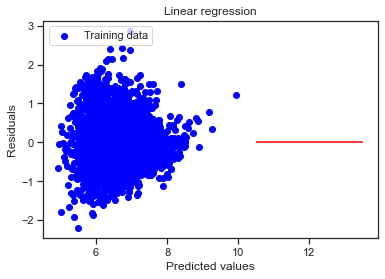

In [1023]:
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue",  label = "Training data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

In [1024]:
from sklearn.model_selection import cross_val_score
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [1025]:
from sklearn.linear_model import Ridge
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0, 0.5, 'rmse')

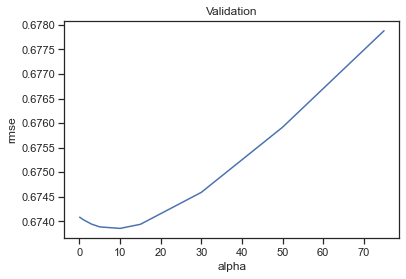

In [1026]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [1027]:
cv_ridge

0.05     0.674082
0.10     0.674079
0.30     0.674067
1.00     0.674028
3.00     0.673940
5.00     0.673884
10.00    0.673853
15.00    0.673937
30.00    0.674587
50.00    0.675914
75.00    0.677881
dtype: float64

In [1028]:
linridge = Ridge(alpha=5).fit(X_train, y_train)

In [1029]:
linridge.score(X_train, y_train)

print('IMDB dataset')

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))
print('Number of zero features: {}'
     .format(np.sum(linridge.coef_ == 0)))

IMDB dataset
ridge regression linear model intercept: 7.326416674131176
ridge regression linear model coeff:
[-6.72339600e-02  2.55216947e-01  4.08702457e-02 -1.84037009e-01
  6.88305635e-01 -1.49715362e-01  6.83758157e-03 -2.84533363e-01
 -3.78644519e-06 -5.41176021e-07  1.42753515e-05  3.95868047e-06
 -5.10558464e-01  9.13169045e-05 -2.37762452e-05  3.81758047e-05
 -5.63288558e-05  5.61289515e-05  4.85730551e-02 -2.03507682e-01
 -1.96207518e-02  2.16982411e-01 -4.24270323e-02  2.76963741e-01
  2.22731635e-02 -2.36654450e-01 -6.25824546e-02 -2.47514381e-02
 -3.28937112e-02 -4.60731267e-02 -8.28991711e-03 -4.65584206e-02
  4.49580020e-03  1.54070813e-01 -4.21655490e-02 -1.29987527e-01
 -8.55392100e-02  1.08449030e-01  1.17457479e-01 -1.17291830e-01
  3.16433517e-02 -9.73882441e-02 -4.65281307e-02  1.45357773e-01
  9.24057067e-02  2.35871487e-02]
R-squared score (training): 0.490
Number of non-zero features: 46
Number of zero features: 0


## Lasso Regression

In [1030]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 3
lasso_cv = LassoCV(alphas=alphas, random_state=0)
# lasso_cv = Lasso(alpha = 0.001)
lasso_cv.fit(X_train, y_train)
#lasso_cv.predict(X_test)
print("Training score: ",lasso_cv.score(X_train, y_train))
print("Testing score: ",lasso_cv.score(X_test, y_test))

Training score:  0.4895809155488725
Testing score:  0.4941957270558691


In [1031]:

tuned_parameters = [{'alpha': alphas}]
n_folds = 3
ridge_cv = RidgeCV(alphas=alphas)
ridge_cv.fit(X_train, y_train)
print("Training score: ",ridge_cv.score(X_train, y_train))
print("Testing score: ",ridge_cv.score(X_test, y_test))

Training score:  0.4901092878559328
Testing score:  0.4938410674801701


In [1032]:
(data['imdb_score']).min()

1.6

# Classifying a movie into 4 classes based on IMDB Score

In [1033]:
temp_whole = pd.concat([X_train,X_test])

In [1034]:
temp_whole.shape

(3167, 46)

In [1035]:
target = pd.concat([y_train,y_test])

In [1036]:
target_classes = pd.cut(target,bins = [0,6,10],labels = [0,1],right = True,include_lowest = True)

In [1037]:
target_classes.value_counts()

1    2334
0     833
Name: imdb_score, dtype: int64

In [1038]:
target_classes.isnull().any()

False

In [1039]:
X_train,X_test,y_train,y_test = train_test_split(temp_whole,target_classes, random_state = 1,test_size = 0.20,stratify =target_classes)

## Logistic Regression

In [1040]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(X_train,y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.79
Accuracy of Logistic regression classifier on test set: 0.78


In [1041]:
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier(n_estimators = 1000,n_jobs=-1,random_state = 0)
dt.fit(X_train, y_train)
dt_score_train = dt.score(X_train, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test, y_test)
print("Testing score: ",dt_score_test)

Training score:  1.0
Testing score:  0.8217665615141956


### Feature Importance

Text(0.5, 0, 'importance')

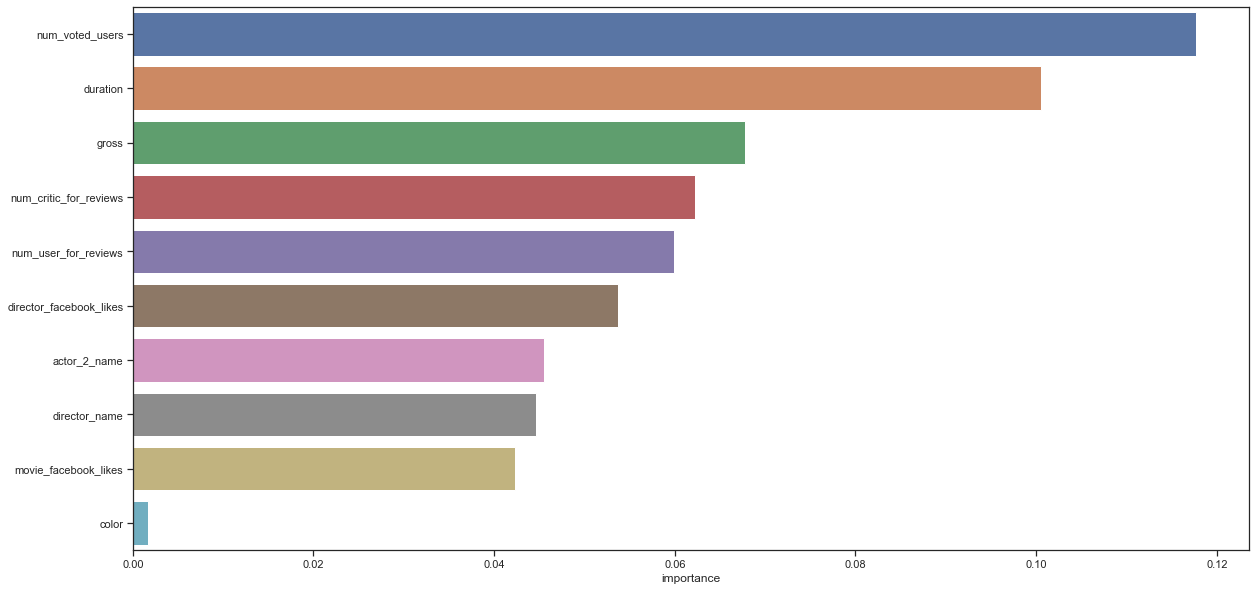

In [1042]:
df = pd.DataFrame(data = dt.feature_importances_[:10],index = temp_whole.columns.tolist()[:10])
df = df[df.iloc[:,0] > 0].sort_values(by = 0,ascending = False)
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(y = df.index, x= df[0])
plt.xlabel('importance')

In [1043]:
from sklearn.model_selection import learning_curve   
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
LogisticRegression(penalty='l2', random_state=0),
X=X_train,
y=y_train,
param_name='C',
param_range=param_range,cv=10)

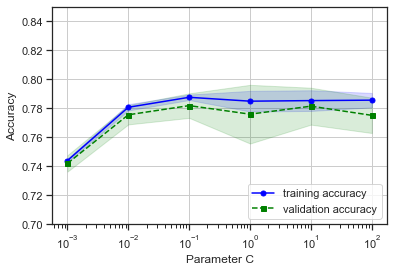

In [1044]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_mean,
color='blue', marker='o',
markersize=5,
label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
train_mean - train_std, alpha=0.15,
color='blue')
plt.plot(param_range, test_mean,
color='green', linestyle='--',
marker='s', markersize=5,
label='validation accuracy')
plt.fill_between(param_range,
test_mean + test_std,
test_mean - test_std,
alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.7, 0.85])
plt.show() 

In [1045]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C = 0.1,penalty='l2', random_state=0)

clf.fit(X_train,y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.79
Accuracy of Logistic regression classifier on test set: 0.78


### Confusion Matrix

In [1046]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 71  96]
 [ 43 424]]


In [1047]:
num_data.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'gross', 'num_voted_users', 'num_user_for_reviews', 'imdb_score',
       'movie_facebook_likes'],
      dtype='object')

## Accuracy measures

In [1048]:
TP=cm[0][0]
FP=cm[1][0]
FN=cm[0][1]
TN=cm[1][1]

P=TP+FN
N=TN+FP
print("accuracy: ",(TP+TN)/(TP+FP+TN+FN))
print("precision for p: ",TP/(TP+FP))
print("precision for n: ",TN/(TN+FN))
print("recall for p/TPR: ",TP/(TP+FN))
print("recall for n/TNR: ",TN/(FP+TN))
print("FPR: ",FP/N)
print("FNR: ",FN/P)

accuracy:  0.7807570977917981
precision for p:  0.6228070175438597
precision for n:  0.8153846153846154
recall for p/TPR:  0.4251497005988024
recall for n/TNR:  0.9079229122055674
FPR:  0.09207708779443255
FNR:  0.5748502994011976
